# Convolutional Neural Network (CNN) for image recognition of the Cifar10 Dataset, implemented on Tensorflow

In the following, a CNN will be implemented for the classification of the Cifar10 dataset, the capabilities of the CNN will be studied by varying parameters such as depth, width, learning rate and dropout and by using the heat maps of some layers as a means to evaluate the patterns that the CNN is looking for.

## <a name="Head"></a> Table of contents
1. [Imports of tools and Cifar10 datasets](#A)
    1. [Building the training and testing sets](#B)
    2. [Visualization of some data points inside the training set](#C)

2. [Data preprocessing](#D)
    1. [Data normalization](#E)
    2. [Data Augmentation](#F)

3. [Training of the CNN](#G)
    1. [Ploting Function for visualization of the training process](#H)
    2. [Hyperparameters of the training process](#I)
    3. [Models definition](#J)
    4. [Models Training process](#K)
4. [Testing of the CNN](#L)
    1. [Predictions of the CNN](#LA)
    2. [Filters of the CNN](#LB)
5. [Conclusions](#M)


## Imports of tools and Cifar10 datasets: <a name="A"></a>
[[back to TOC]](#Head)

In [1]:
# Tensorflow instances

from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation, Dropout, BatchNormalization, MaxPooling2D, Softmax
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers

# Drive setup

import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/models')

# Import Models

from shallow_model import shallow_model as sm
from narrow_model import narrow_model as nm
from no_dropout_model import no_dropout_model as om
from complete_model import complete_model as cm

# Data analysis Tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
import itertools
import time

# Cifar10 Dataset

import tensorflow.keras.datasets.cifar10 as cifar10

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Building the training and testing sets: <a name="B"></a>
[[back to TOC]](#Head)

In [36]:
# Download dataset of CIFAR-10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shape of the array

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset

print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format

print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Visualization of some data points inside the training set: <a name="C"></a>
[[back to TOC]](#Head)

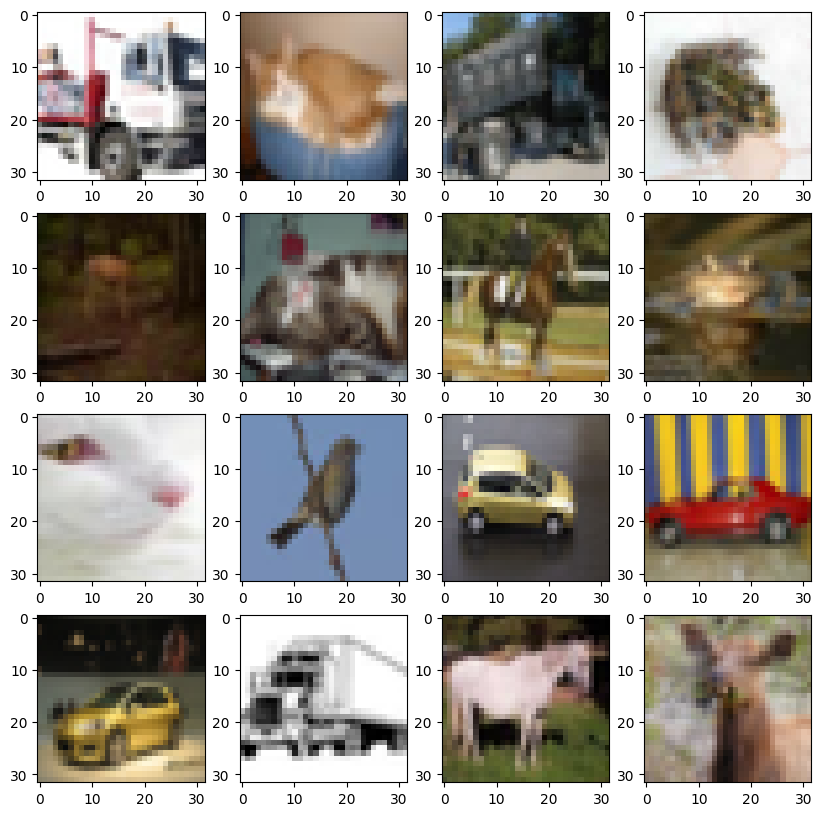

In [37]:
# Show randomly 16 images in the CIFAR-10
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

## Data preprocessing: <a name="D"></a>
[[back to TOC]](#Head)

### Data normalization: <a name="E"></a>

In [38]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

### Data Augmentation: <a name="F"></a>
To avoid overfitting and to increase the number of data within the training set it is desirable to increase the number of data based on the rotation over the original set. This will lead the CNN to look for deeper paterns and to avoid oversimplistic behaviour.

In [39]:
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

## Training of the CNN: <a name="G"></a>
[[back to TOC]](#Head)

Firstly, a ploting function and a set of hyperparameters will be defined in order to prepare for the training.

#### Ploting Function for visualization of the training process: <a name="H"></a>

In [40]:
def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

#### Hyperparameters of the training process: <a name="I"></a>

> Indented block



In [3]:
batch_size = 32
num_classes = 10
epochs = 150

### Models definition: <a name="J"></a>
[[back to TOC]](#Head)
Secondly, 4 models will be defined, a Shallow one (fewer layers), a Narrow one (fewer channels), another one with depth and width but without dropout and Batch Normalization, and finally one with the 3 considerations.

#### Shallow Model: <a name="JA"></a>

In [4]:
# Shallow Model
# Build CNN model
smodel = sm(input_shape=(32,32,3),num_classes=num_classes)
smodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [43]:
smodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

#### Narrow Model: <a name="JB"></a>

In [5]:
# Narrow Model
# Build CNN model
nmodel = nm(input_shape=(32,32,3),num_classes=num_classes)

nmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 4)         112       
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 4)         16        
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 8)         32        
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 16)       

In [45]:
nmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

#### Overfit Model: <a name="JC"></a>

In [6]:
# No-Dropout Model
# Build CNN model
omodel = om(input_shape=(32,32,3),num_classes=num_classes)

omodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)      

In [47]:
omodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

#### Complete Model: <a name="JD"></a>

In [7]:
# Model
# Build CNN model
model = cm(input_shape=(32,32,3),num_classes=num_classes)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)      

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Models Training process: <a name="K"></a>
[[back to TOC]](#Head)


#### Training Shallow Model: <a name="KA"></a>

In [50]:
training_start = time.time()
shistory = smodel.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=100,
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 7s 52ms/step - loss: 2.1056 - acc: 0.2894 - val_loss: 2.1747 - val_acc: 0.3306
Epoch 2/150
100/100 [==============================] - 3s 30ms/step - loss: 1.8066 - acc: 0.3544 - val_loss: 2.0735 - val_acc: 0.4033
Epoch 3/150
100/100 [==============================] - 3s 29ms/step - loss: 1.7110 - acc: 0.3847 - val_loss: 1.9280 - val_acc: 0.4279
Epoch 4/150
100/100 [==============================] - 3s 34ms/step - loss: 1.6352 - acc: 0.4291 - val_loss: 1.7615 - val_acc: 0.4483
Epoch 5/150
100/100 [==============================] - 5s 45ms/step - loss: 1.5615 - acc: 0.4509 - val_loss: 1.6307 - val_acc: 0.4544
Epoch 6/150
100/100 [==============================] - 3s 33ms/step - loss: 1.5651 - acc: 0.4425 - val_loss: 1.5402 - val_acc: 0.4570
Epoch 7/150
100/100 [==============================] - 5s 46ms/step - loss: 1.5022 - acc: 0.4606 - val_loss: 1.4106 - val_acc: 0.5048
Epoch 8/150
100/100 [==============================] - 5s 49ms

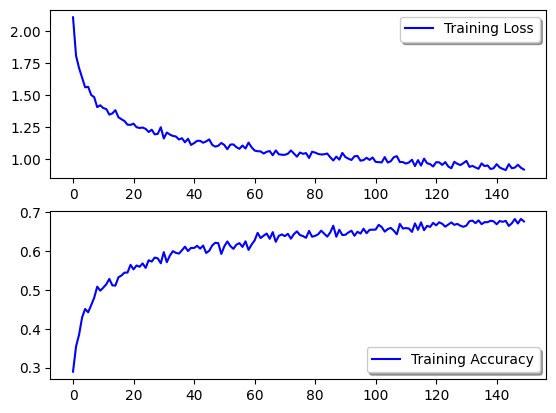

In [51]:
fig, ax = plt.subplots(2,1)
ax[0].plot(shistory.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(shistory.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [64]:
test_loss_s, test_acc_s = smodel.evaluate(X_validation, y_validation)
#Saving the model
smodel.save('/content/gdrive/MyDrive/Colab Notebooks/shallow_model.keras', save_format='h5')

313/313 [==============================] - 1s 4ms/step - loss: 1.1654 - acc: 0.6657


#### Training Narrow Model: <a name="KB"></a>

In [53]:
training_start = time.time()
nhistory = nmodel.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=100,
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 7s 53ms/step - loss: 2.3825 - acc: 0.2075 - val_loss: 2.3606 - val_acc: 0.1259
Epoch 2/150
100/100 [==============================] - 4s 35ms/step - loss: 1.9870 - acc: 0.3022 - val_loss: 2.5018 - val_acc: 0.1289
Epoch 3/150
100/100 [==============================] - 3s 28ms/step - loss: 1.9010 - acc: 0.3309 - val_loss: 2.2009 - val_acc: 0.2270
Epoch 4/150
100/100 [==============================] - 3s 29ms/step - loss: 1.8398 - acc: 0.3491 - val_loss: 1.7900 - val_acc: 0.3484
Epoch 5/150
100/100 [==============================] - 4s 42ms/step - loss: 1.8093 - acc: 0.3647 - val_loss: 1.6195 - val_acc: 0.4185
Epoch 6/150
100/100 [==============================] - 3s 32ms/step - loss: 1.7215 - acc: 0.3781 - val_loss: 1.5868 - val_acc: 0.4345
Epoch 7/150
100/100 [==============================] - 3s 32ms/step - loss: 1.7119 - acc: 0.4031 - val_loss: 1.5803 - val_acc: 0.4395
Epoch 8/150
100/100 [==============================] - 3s 33ms

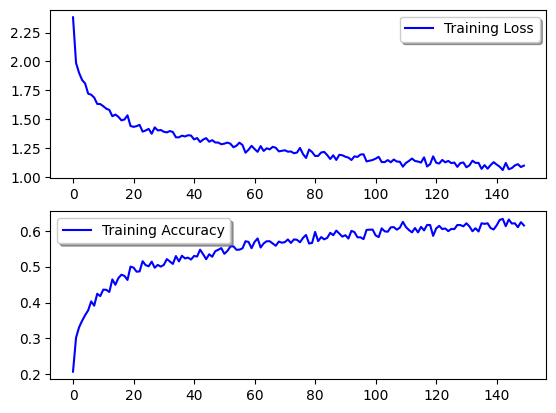

In [54]:
fig, ax = plt.subplots(2,1)
ax[0].plot(nhistory.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(nhistory.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [65]:
test_loss_n, test_acc_n = nmodel.evaluate(X_validation, y_validation)
#Saving the model
nmodel.save('/content/gdrive/MyDrive/Colab Notebooks/narrow_model.keras', save_format='h5')

313/313 [==============================] - 1s 3ms/step - loss: 1.1587 - acc: 0.6318


#### Training No-Dropout Model: <a name="KC"></a>

In [56]:
training_start = time.time()
ohistory = omodel.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=100,
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 8s 55ms/step - loss: 1.9517 - acc: 0.3484 - val_loss: 3.7376 - val_acc: 0.1004
Epoch 2/150
100/100 [==============================] - 3s 35ms/step - loss: 1.6033 - acc: 0.4347 - val_loss: 4.2984 - val_acc: 0.0988
Epoch 3/150
100/100 [==============================] - 9s 89ms/step - loss: 1.5079 - acc: 0.4734 - val_loss: 4.5175 - val_acc: 0.1899
Epoch 4/150
100/100 [==============================] - 3s 35ms/step - loss: 1.4688 - acc: 0.4959 - val_loss: 2.5813 - val_acc: 0.2575
Epoch 5/150
100/100 [==============================] - 4s 37ms/step - loss: 1.4273 - acc: 0.4916 - val_loss: 1.5403 - val_acc: 0.4447
Epoch 6/150
100/100 [==============================] - 5s 49ms/step - loss: 1.3525 - acc: 0.5213 - val_loss: 1.3858 - val_acc: 0.5153
Epoch 7/150
100/100 [==============================] - 3s 33ms/step - loss: 1.3399 - acc: 0.5191 - val_loss: 1.4213 - val_acc: 0.5125
Epoch 8/150
100/100 [==============================] - 3s 33ms

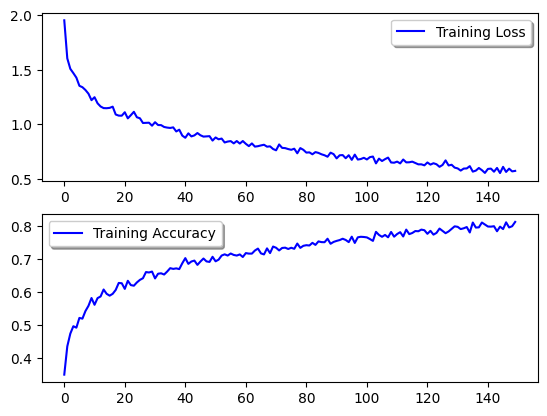

In [57]:
fig, ax = plt.subplots(2,1)
ax[0].plot(ohistory.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(ohistory.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [66]:
test_loss_o, test_acc_o = omodel.evaluate(X_validation, y_validation)
#Saving the model
omodel.save('/content/gdrive/MyDrive/Colab Notebooks/no_dropout_model.keras', save_format='h5')

313/313 [==============================] - 1s 5ms/step - loss: 1.0746 - acc: 0.7062


#### Training Complete Model: <a name="KC"></a>

In [59]:
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=100,
          epochs=epochs,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 6s 41ms/step - loss: 2.1034 - acc: 0.3119 - val_loss: 2.6970 - val_acc: 0.1023
Epoch 2/150
100/100 [==============================] - 4s 42ms/step - loss: 1.7516 - acc: 0.3716 - val_loss: 3.0982 - val_acc: 0.1918
Epoch 3/150
100/100 [==============================] - 4s 41ms/step - loss: 1.6382 - acc: 0.4288 - val_loss: 2.6809 - val_acc: 0.2503
Epoch 4/150
100/100 [==============================] - 5s 49ms/step - loss: 1.6333 - acc: 0.4197 - val_loss: 2.4532 - val_acc: 0.2320
Epoch 5/150
100/100 [==============================] - 4s 39ms/step - loss: 1.5646 - acc: 0.4528 - val_loss: 1.7647 - val_acc: 0.3666
Epoch 6/150
100/100 [==============================] - 3s 34ms/step - loss: 1.5279 - acc: 0.4644 - val_loss: 1.4282 - val_acc: 0.4857
Epoch 7/150
100/100 [==============================] - 7s 70ms/step - loss: 1.4844 - acc: 0.4731 - val_loss: 1.3599 - val_acc: 0.5265
Epoch 8/150
100/100 [==============================] - 3s 34ms

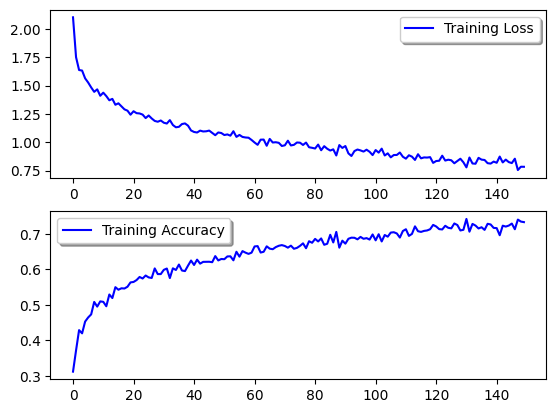

In [60]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [67]:
test_loss, test_acc = model.evaluate(X_validation, y_validation)
#Saving the model
model.save('/content/gdrive/MyDrive/Colab Notebooks/complete_model.keras', save_format='h5')

313/313 [==============================] - 2s 7ms/step - loss: 0.9964 - acc: 0.7073


## Testing of the CNN: <a name="L"></a>
[[back to TOC]](#Head)

The following section will show the performance of each network in the test set, as well as the feature maps and some of the channels in the first layer of each network.

In [16]:
# Another layes is added in order get an output beter suited for probability predictions

probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [17]:
classes = np.array(['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Predictions of the CNN: <a name="LA"></a>


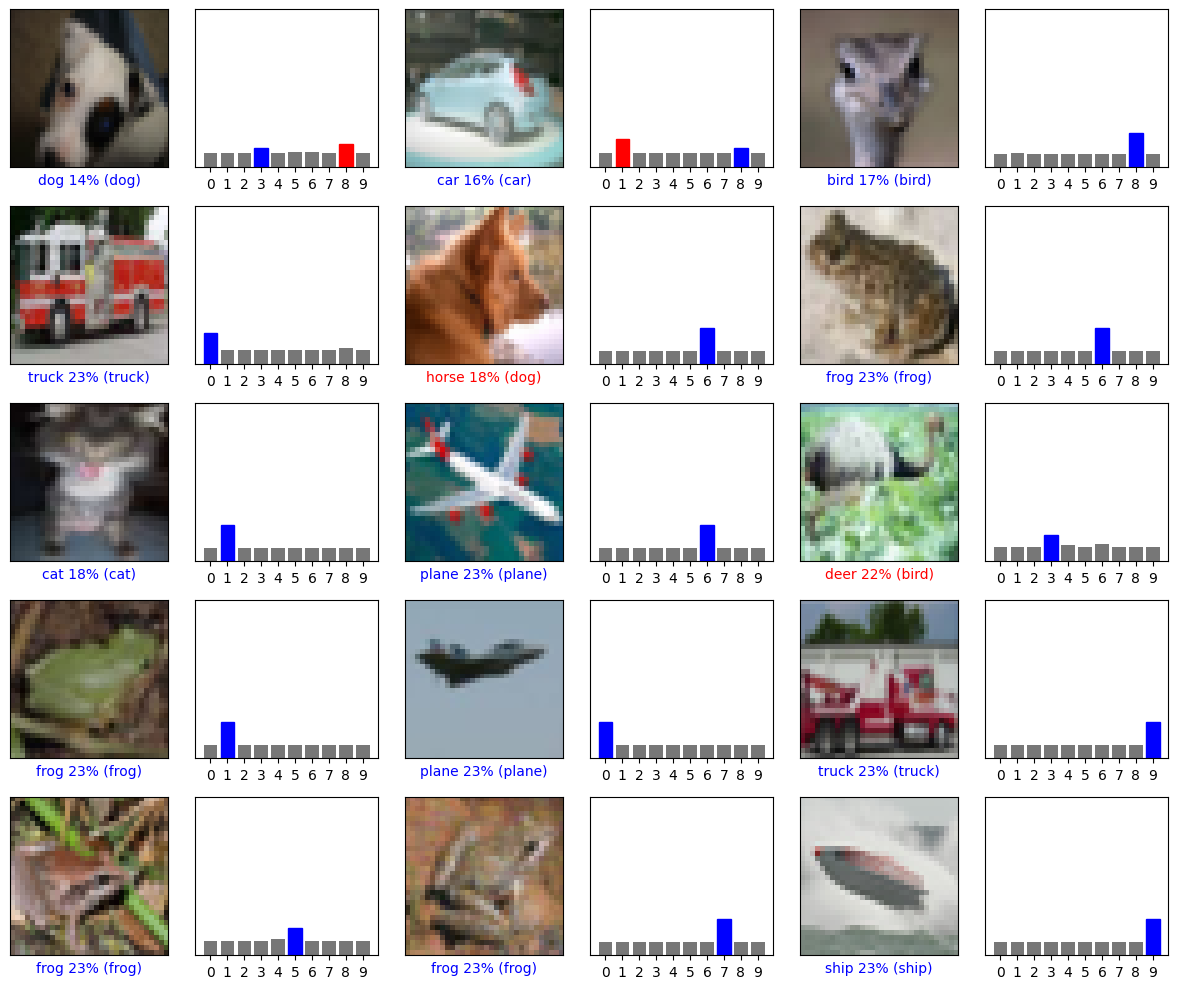

In [18]:
# 15 images are plotted to get a rough idea of how the network is performing in terms of singular examples

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  j = np.random.randint(0, 10000)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j, predictions[j], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Filters of the CNN: <a name="LB"></a>


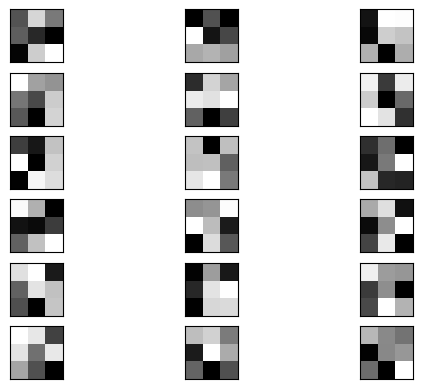

In [29]:
# retrieve weights from the second hidden layer
[filters, biases] = model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Feature Maps of the CNN: <a name="GC"></a>

The following 5 graphs show the random image feature maps of the test set in the first layer of the full model.


1/1 [==============================] - 0s 60ms/step


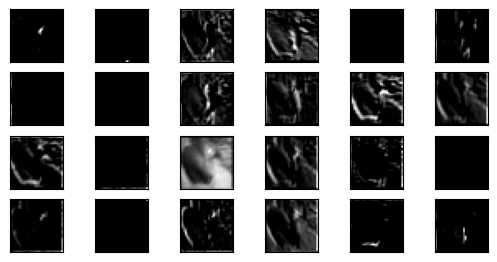

1/1 [==============================] - 0s 22ms/step


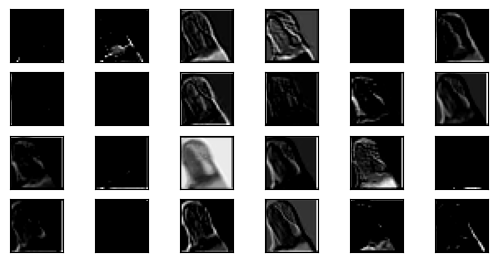

1/1 [==============================] - 0s 26ms/step


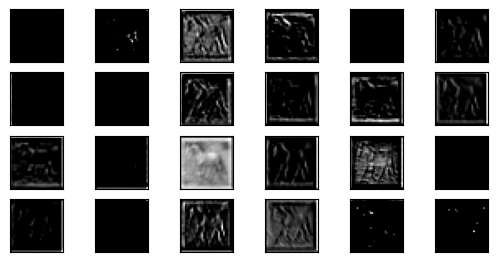

1/1 [==============================] - 0s 17ms/step


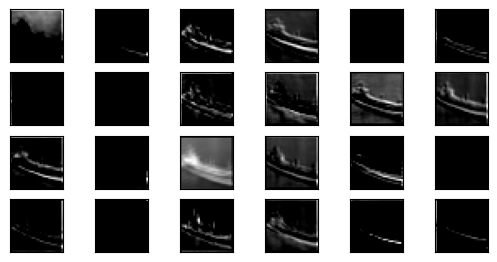

1/1 [==============================] - 0s 17ms/step


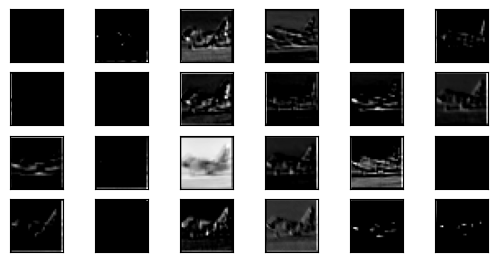

In [81]:
# redefine model to output right after the first hidden layer
modelf = Model(inputs=model.inputs, outputs=model.layers[0].output)
# get feature map for first hidden layer
for i in range(5):
  j=np.random.randint(0, 10000)
  feature_maps = modelf.predict(x_test[j][None,:])
  # plot all 64 maps in an 8x8 squares
  square = 6
  ix = 1
  for _ in range(square - 2):
    for _ in range(square):
      # specify subplot and turn of axis
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
      ix += 1
  # show the figure
  plt.show()

## Conclusions <a name="M"></a>
[[back to TOC]](#Head)




The results show that the training process is similar for the narrow, no dropout and full models, for which cifar10 is a manageable dataset. The results for the full sets are acceptable and can predict the correct class with good fidelity. The feature maps shows the contours and patterns that the CNN considered most relevant during the search using the first layer filters, as well as showing the boundaries of the shapes and the contrast between the main body and the background.